In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


df = pd.read_csv('/content/Bank_Customerdata.csv')

df.head(3)



,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,39,14,127000,49560,1,567.28,2,36000,1,0,1,0,1
1,2,36,0,72000,63865,1,3927.17,1,341000,1,0,0,0,0
2,3,37,5,147000,56686,2,369.79,1,326000,0,0,0,1,0


In [5]:
# Drop unnecessary columns
df.drop(columns=['ID', 'Zipcode'], inplace=True)

X = df.drop(columns=['Personal Loan'])  # All features except target
y = df['Personal Loan']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Define the model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer (number of features)
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   #  Second hidden layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))






Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7167 - loss: 0.6161 - val_accuracy: 0.8500 - val_loss: 0.4650
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8672 - loss: 0.4388 - val_accuracy: 0.8500 - val_loss: 0.4269
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8757 - loss: 0.3775 - val_accuracy: 0.8500 - val_loss: 0.4291
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8729 - loss: 0.3583 - val_accuracy: 0.8500 - val_loss: 0.4211
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8630 - loss: 0.3722 - val_accuracy: 0.8500 - val_loss: 0.4184
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8677 - loss: 0.3543 - val_accuracy: 0.8500 - val_loss: 0.4190
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8402 - loss: 0.3825 - val_accuracy: 0.8500 - val_loss: 0.4220
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8564 - loss: 0.3519 - val_accuracy: 0.8500 - val_l

In [7]:


# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")




3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7961 - loss: 1.0143
Validation Accuracy: 0.7875
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8177 - loss: 0.6953 
Test Accuracy: 0.8100


In [6]:
# Make predictions

# Make predictions
y_pred_prob = model.predict(X_test, batch_size=32).flatten()  # Use batch processing
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)


# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 0.8100
Precision: 0.3000
Recall: 0.2000
F1-Score: 0.2400
ROC-AUC: 0.6251


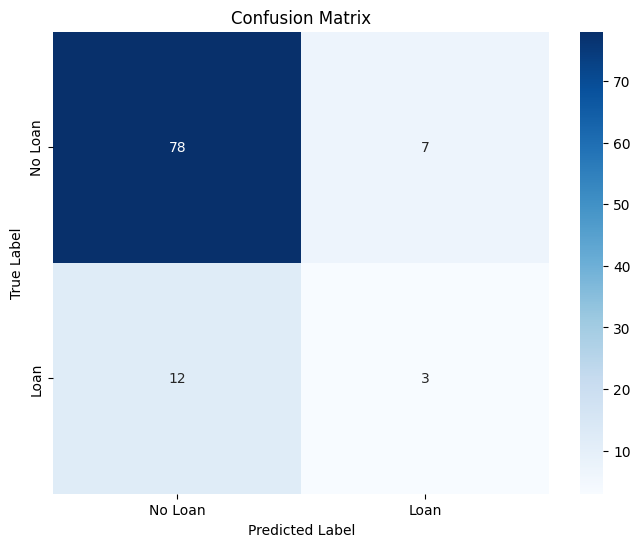

In [8]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
